### 1.Data Quality Checks and conversion of Exports, Imports, Health columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv("Country-data.csv")
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
#Convert exports per capita to Exports by multiplying gdpp
df.exports = df.exports * df.gdpp

In [7]:
#Convert health per capita to Exports by multiplying gdpp
df.health = df.health * df.gdpp

In [8]:
#Convert imports per capita to Exports by multiplying gdpp
df.imports = df.imports * df.gdpp

In [9]:
#Finding the percentage of missing values in all the columns
d={}
for i in range(0,df.shape[1]):
    d[df.columns[i]]=(df[df[df.columns[i]].isnull()].shape[0]/df.shape[0])*100
for i,j in d.items():
    print(i,j)

country 0.0
child_mort 0.0
exports 0.0
health 0.0
imports 0.0
income 0.0
inflation 0.0
life_expec 0.0
total_fer 0.0
gdpp 0.0


### 2.Univariate and Bivariate Analysis

In [10]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

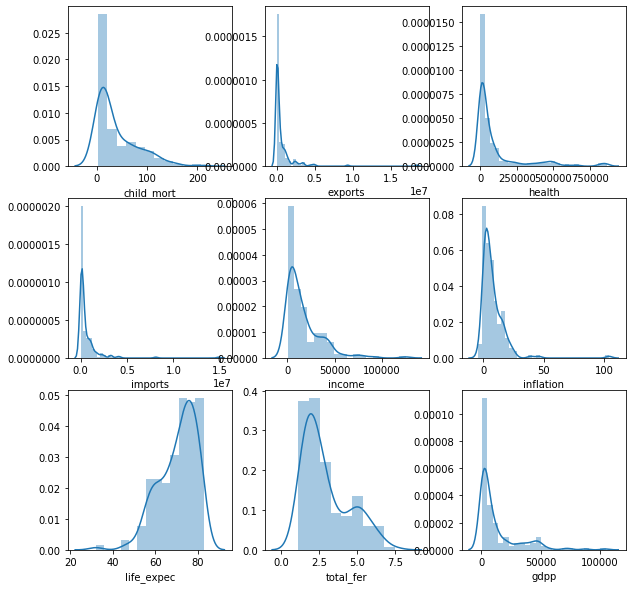

In [11]:
#Visualizing the Numeric columns
plt.figure(figsize = (10,10))
f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

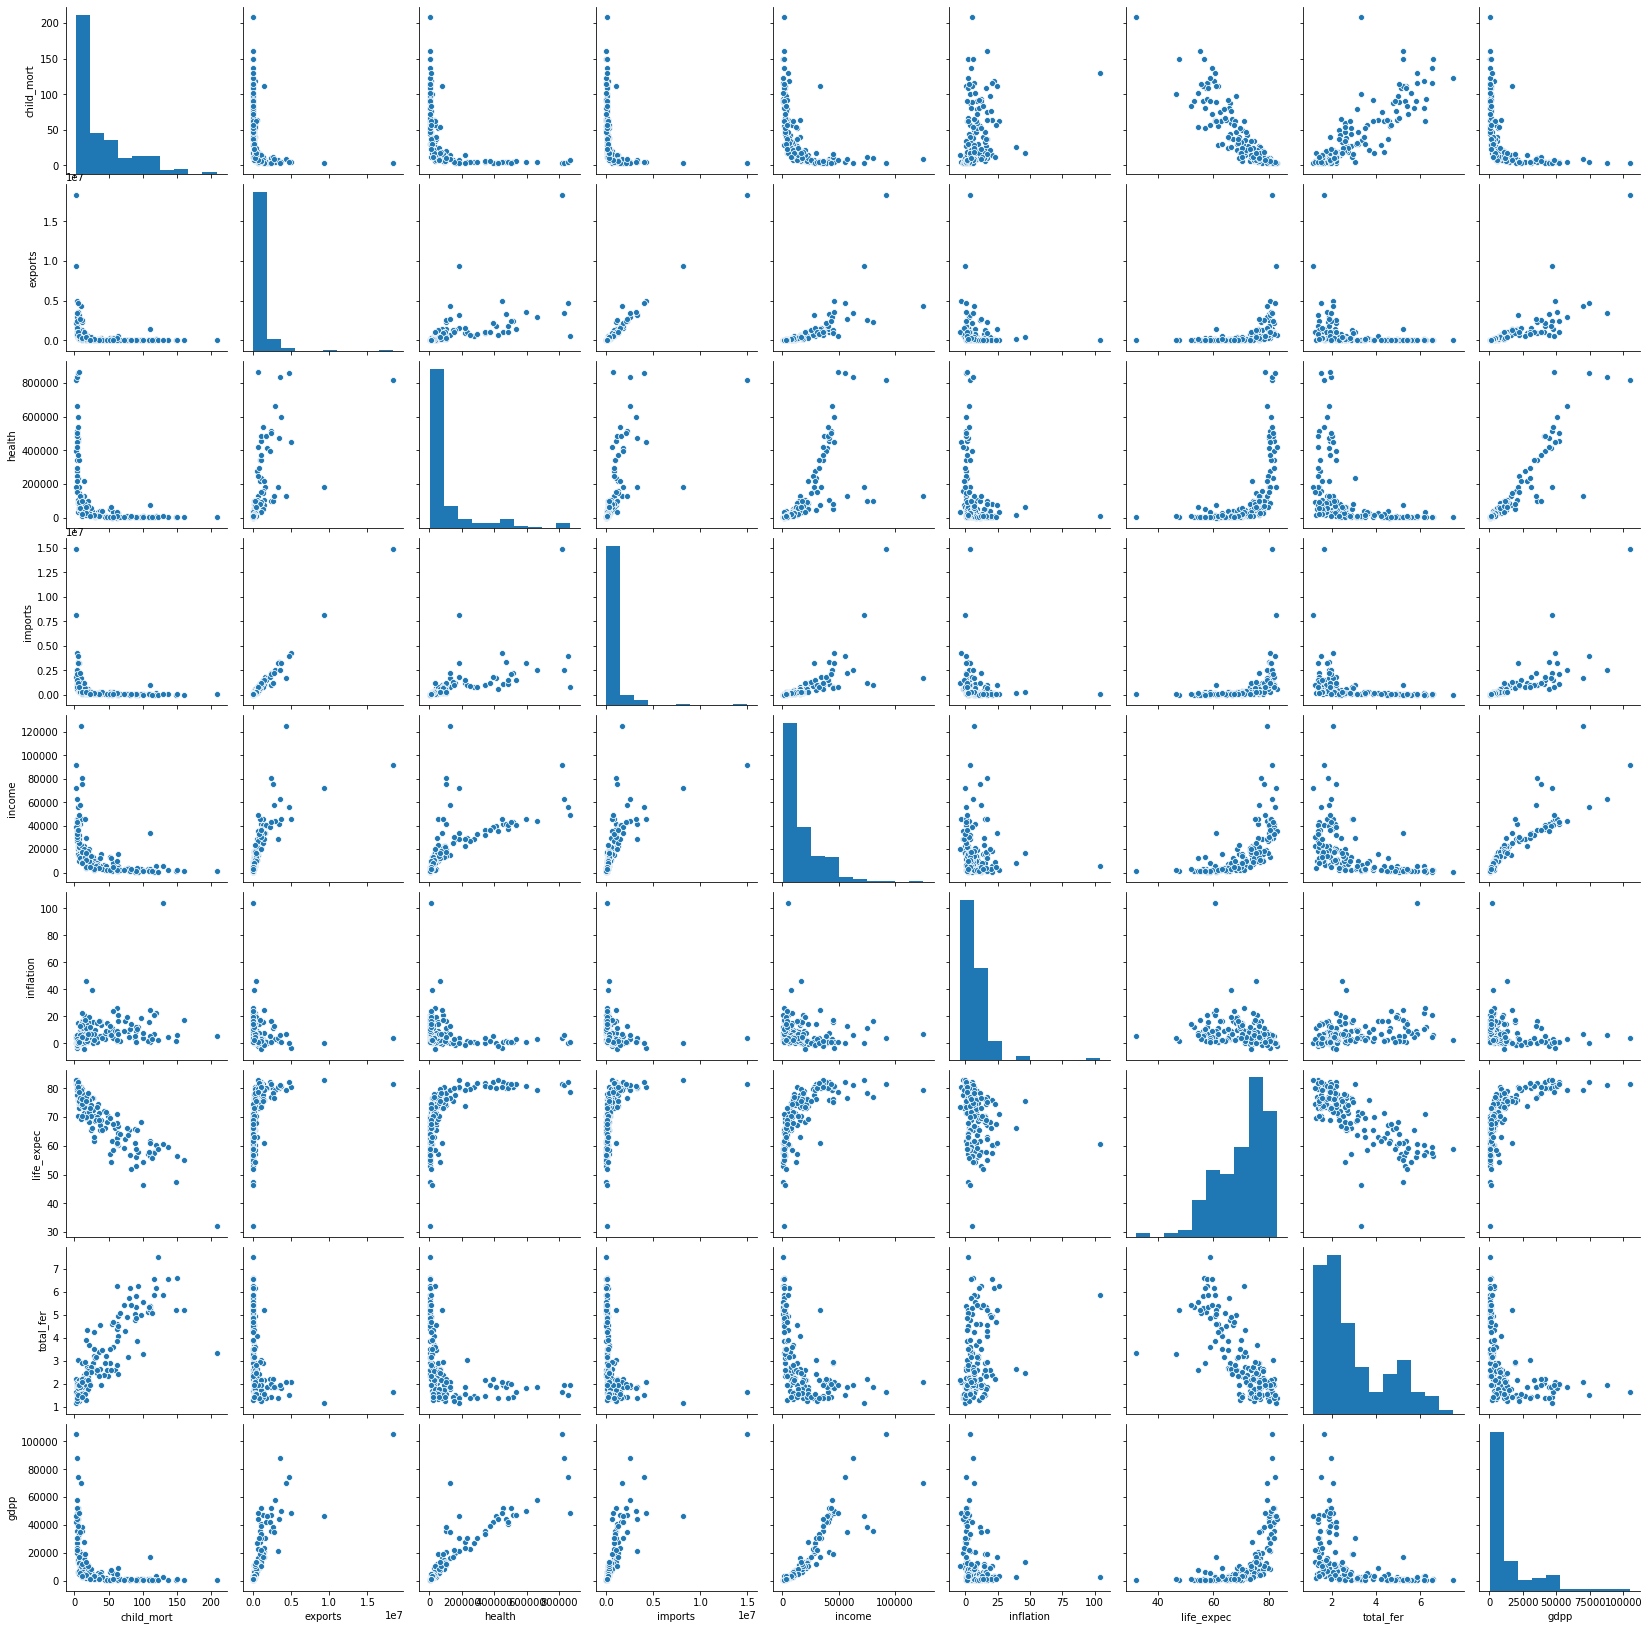

In [12]:
#Visualizing the relation between all the columns
sns.pairplot(df)
plt.show()

### 3.Outlier Analysis 

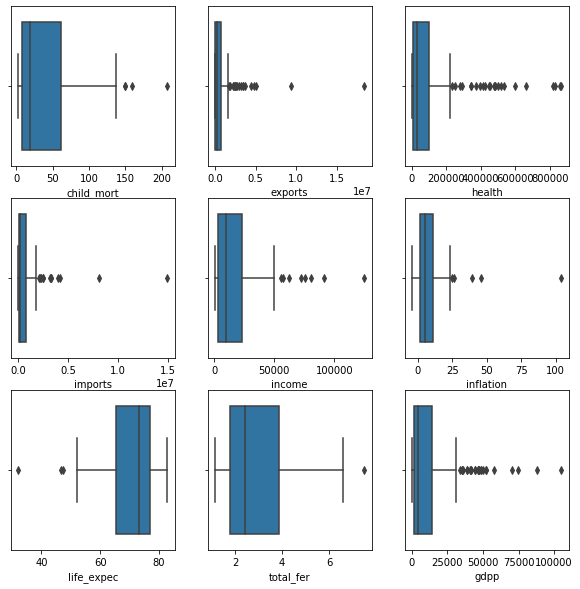

In [13]:
plt.figure(figsize = (10,10))
f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =df)

In [14]:
#Child_Mort
q1 = df['child_mort'].quantile(0.01)

df['child_mort'][df['child_mort']<=q1] = q1

#Inflation
q1 = df['inflation'].quantile(0.01)

df['inflation'][df['inflation']<=q1] = q1

#Exports
q2 = df['exports'].quantile(0.98)

df['exports'][df['exports']>=q2]= q2

#Health
q2 = df['health'].quantile(0.97)

df['health'][df['health']>=q2]= q2

#Import
q2 = df['imports'].quantile(0.99)

df['imports'][df['imports']>=q2]= q2

#Income
q2 = df['income'].quantile(0.98)

df['income'][df['income']>=q2]= q2

#Life_expec
q1 = df['life_expec'].quantile(0.01)

df['life_expec'][df['life_expec']<=q1]= q1

#Total_fer
q2 = df['total_fer'].quantile(0.99)

df['total_fer'][df['total_fer']>=q2]= q2

#Gdpp
q2 = df['gdpp'].quantile(0.97)

df['gdpp'][df['gdpp']>=q2]= q2

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-

### 4.Hopkins

In [15]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
hopkins(df.drop('country', axis =1))

0.9493659965821812

Since we are getting the data more than 80 everytime then we can go ahead with the clustering

### 5.Scaling

In [26]:
ss = StandardScaler()
df1 = ss.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.29153663, -0.60700492, -0.60696248, ..., -1.69307077,
         1.92639646, -0.74820639],
       [-0.53899289, -0.5008812 , -0.46301806, ...,  0.66202581,
        -0.86505432, -0.52016835],
       [-0.27286971, -0.44562948, -0.51519544, ...,  0.6854596 ,
        -0.03498262, -0.49631365],
       ...,
       [-0.37235501, -0.52054997, -0.57658682, ...,  0.28708506,
        -0.66423052, -0.69940096],
       [ 0.44839871, -0.57412302, -0.5904387 , ..., -0.36906125,
         1.15657191, -0.69940096],
       [ 1.11495022, -0.55979014, -0.57888633, ..., -2.1851805 ,
         1.64524315, -0.68973014]])

In [27]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291537 -0.607005 -0.606962 -0.598741 -0.870777   0.156035   -1.693071   
1   -0.538993 -0.500881 -0.463018 -0.413584 -0.390399  -0.314406    0.662026   
2   -0.272870 -0.445629 -0.515195 -0.476100 -0.218918   0.788991    0.685460   
3    2.007831 -0.398254 -0.569579 -0.463973 -0.623082   1.387733   -1.236112   
4   -0.695682 -0.071888 -0.165059  0.139728  0.139056  -0.604273    0.720610   

   total_fer      gdpp  
0   1.926396 -0.748206  
1  -0.865054 -0.520168  
2  -0.034983 -0.496314  
3   2.153997 -0.556273  
4  -0.543736  0.002701

### 6.KMeans Clustering

#### Silhoutte Analysis

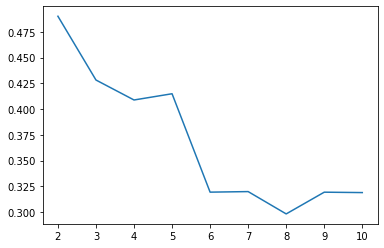

In [28]:
# Silhouette Analysis

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])

sil =pd.DataFrame(ss)
plt.plot(sil[0], sil[1])

#### Elbow Curve

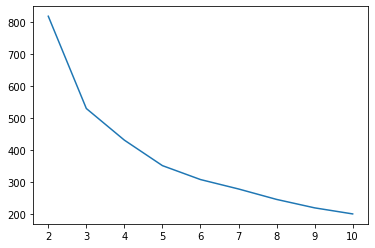

In [29]:
## Elbow Curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

#### KMean with K=3

In [30]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [31]:
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [32]:
df.head()

country  child_mort   exports    health   imports   income  \
0          Afghanistan        90.2    5530.0   4191.74   24829.7   1610.0   
1              Albania        16.6  114520.0  26789.50  198774.0   9930.0   
2              Algeria        27.3  171264.0  18598.20  140044.0  12900.0   
3               Angola       119.0  219919.0  10060.50  151437.0   5900.0   
4  Antigua and Barbuda        10.3  555100.0  73566.00  718580.0  19100.0   

   inflation  life_expec  total_fer     gdpp  
0       9.44        56.2       5.82    553.0  
1       4.49        76.3       1.65   4090.0  
2      16.10        76.5       2.89   4460.0  
3      22.40        60.1       6.16   3530.0  
4       1.44        76.8       2.13  12200.0

In [33]:
## Adding the labels with the original DF
df['cluster_id'] = kmean.labels_

In [34]:
df.head()

country  child_mort   exports    health   imports   income  \
0          Afghanistan        90.2    5530.0   4191.74   24829.7   1610.0   
1              Albania        16.6  114520.0  26789.50  198774.0   9930.0   
2              Algeria        27.3  171264.0  18598.20  140044.0  12900.0   
3               Angola       119.0  219919.0  10060.50  151437.0   5900.0   
4  Antigua and Barbuda        10.3  555100.0  73566.00  718580.0  19100.0   

   inflation  life_expec  total_fer     gdpp  cluster_id  
0       9.44        56.2       5.82    553.0           0  
1       4.49        76.3       1.65   4090.0           1  
2      16.10        76.5       2.89   4460.0           1  
3      22.40        60.1       6.16   3530.0           0  
4       1.44        76.8       2.13  12200.0           1

In [35]:
# Check the number of Data Points in each cluster
df.cluster_id.value_counts()

1    89
0    48
2    30
Name: cluster_id, dtype: int64

### Plotting the cluster WRT to the data

GDPP, Income and Child_Mort

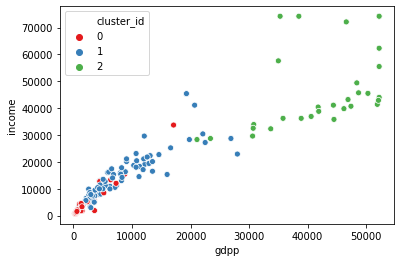

In [36]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = df, palette ='Set1')

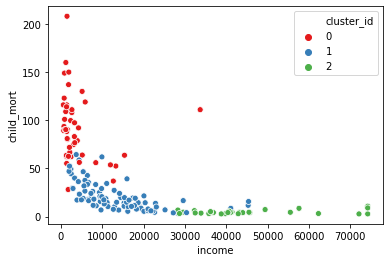

In [37]:
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_id', data = df, palette ='Set1')

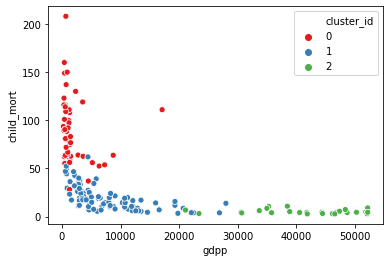

In [38]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = df, palette ='Set1')

### Cluster Profiling

GDPP, Income and Child_Mort

In [39]:
df[['gdpp', 'income', 'child_mort', 'cluster_id']].groupby('cluster_id').mean()

gdpp        income  child_mort
cluster_id                                        
0            1909.208333   3897.354167   91.610417
1            7552.494382  13626.853933   20.726966
2           42219.666667  46254.400000    4.976667

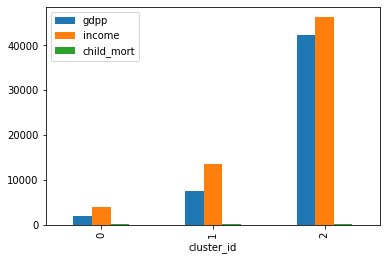

In [46]:
df[['gdpp', 'income', 'child_mort', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

Cluster having low gdpp, low income and high child_mort is cluster number 0.

### Find the countries

In [41]:
c1 = df[df['cluster_id']==0]

In [42]:
c1.head()

country  child_mort   exports    health   imports   income  \
0    Afghanistan        90.2    5530.0   4191.74   24829.7   1610.0   
3         Angola       119.0  219919.0  10060.50  151437.0   5900.0   
17         Benin       111.0   18040.4   3107.80   28197.6   1820.0   
21      Botswana        52.5  276860.0  52705.00  325755.0  13300.0   
25  Burkina Faso       116.0   11040.0   3875.50   17020.0   1430.0   

    inflation  life_expec  total_fer    gdpp  cluster_id  
0       9.440        56.2       5.82   553.0           0  
3      22.400        60.1       6.16  3530.0           0  
17      0.885        61.8       5.36   758.0           0  
21      8.920        57.1       2.88  6350.0           0  
25      6.810        57.9       5.87   575.0           0

In [47]:
c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head()

country  child_mort   exports   health  imports  income  \
26            Burundi        93.6   2060.52  2679.60   9055.2   764.0   
88            Liberia        89.3   6245.70  3858.60  30280.2   700.0   
37   Congo, Dem. Rep.       116.0  13727.40  2641.94  16566.4   609.0   
112             Niger       123.0   7725.60  1795.68  17086.8   814.0   
132      Sierra Leone       160.0   6703.20  5226.90  13765.5  1220.0   

     inflation  life_expec  total_fer   gdpp  cluster_id  
26       12.30        57.7     6.2600  231.0           0  
88        5.47        60.8     5.0200  327.0           0  
37       20.80        57.5     6.5400  334.0           0  
112       2.55        58.8     6.5636  348.0           0  
132      17.20        55.0     5.2000  399.0           0

Top 5 countries meeting are: Burundi, Liiberia, Congo,Dem. Rep., Niger ,Sierra Leone

## Hierarchical Clustering 

Since we have already done Univariate and Bivariate Analysis,Outlier Analysis and Standardization for KMeans we can use the same data set for Hierarchical clustering also.

In [48]:
df1.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291537 -0.607005 -0.606962 -0.598741 -0.870777   0.156035   -1.693071   
1   -0.538993 -0.500881 -0.463018 -0.413584 -0.390399  -0.314406    0.662026   
2   -0.272870 -0.445629 -0.515195 -0.476100 -0.218918   0.788991    0.685460   
3    2.007831 -0.398254 -0.569579 -0.463973 -0.623082   1.387733   -1.236112   
4   -0.695682 -0.071888 -0.165059  0.139728  0.139056  -0.604273    0.720610   

   total_fer      gdpp  
0   1.926396 -0.748206  
1  -0.865054 -0.520168  
2  -0.034983 -0.496314  
3   2.153997 -0.556273  
4  -0.543736  0.002701

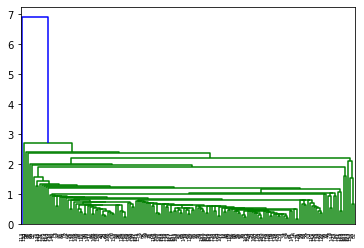

In [51]:
# single linkage
mergings_s = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

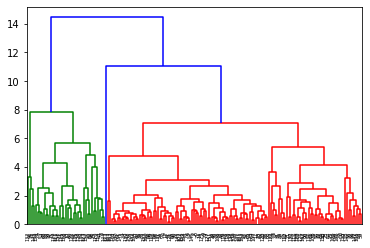

In [52]:
# complete linkage
mergings_c = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

As we can see, using the complete linkage we are able to see the clusters bit more clearer than using single linkage so we will be going ahead with complete linkage

In [53]:
# 3 clusters
cluster_labels = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [54]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

country  child_mort   exports    health   imports   income  \
0          Afghanistan        90.2    5530.0   4191.74   24829.7   1610.0   
1              Albania        16.6  114520.0  26789.50  198774.0   9930.0   
2              Algeria        27.3  171264.0  18598.20  140044.0  12900.0   
3               Angola       119.0  219919.0  10060.50  151437.0   5900.0   
4  Antigua and Barbuda        10.3  555100.0  73566.00  718580.0  19100.0   

   inflation  life_expec  total_fer     gdpp  cluster_id  cluster_labels  
0       9.44        56.2       5.82    553.0           0               0  
1       4.49        76.3       1.65   4090.0           1               0  
2      16.10        76.5       2.89   4460.0           1               0  
3      22.40        60.1       6.16   3530.0           0               0  
4       1.44        76.8       2.13  12200.0           1               0

In [59]:
# Check the number of Data Points in each cluster
df.cluster_labels.value_counts()

0    127
1     39
2      1
Name: cluster_labels, dtype: int64

### Plotting the cluster WRT to the data

GDPP, Income and Child_Mort

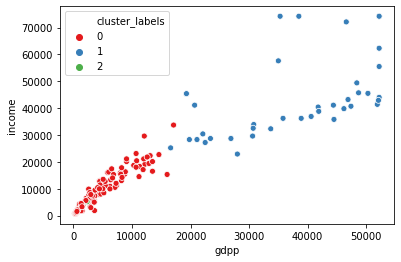

In [55]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_labels', data = df, palette ='Set1')

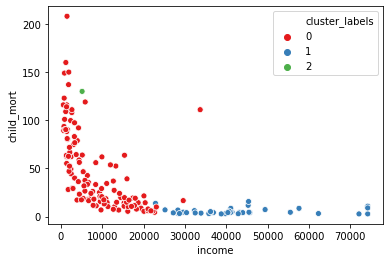

In [57]:
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_labels', data = df, palette ='Set1')

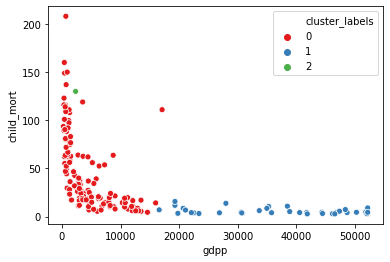

In [61]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_labels', data = df, palette ='Set1')

### Cluster Profiling

GDPP, Income and Child_Mort

In [62]:
df[['gdpp', 'income', 'child_mort', 'cluster_labels']].groupby('cluster_labels').mean()

gdpp        income  child_mort
cluster_labels                                        
0                4458.929134   8663.094488   47.558268
1               37481.794872  43131.589744    5.676923
2                2330.000000   5150.000000  130.000000

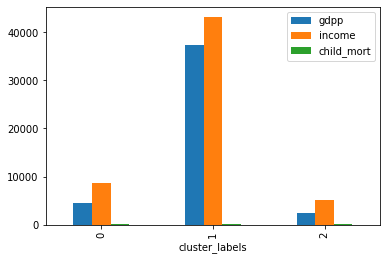

In [63]:
df[['gdpp', 'income', 'child_mort', 'cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

Cluster having low gdpp, low income and high child_mort is cluster number 2.

### Find the countries

In [64]:
c1 = df[df['cluster_labels']==2]

In [66]:
c1

country  child_mort  exports   health  imports  income  inflation  \
113  Nigeria       130.0  58949.0  11813.1  40542.0  5150.0      104.0   

     life_expec  total_fer    gdpp  cluster_id  cluster_labels  
113        60.5       5.84  2330.0           0               2

Since in Hierarchical clustering for the cluster satisfying out business condition is only having one data point, so to finalize the number of countries we will go with KMeans results.

According to KMeans the Top 5 countries meeting out bisuness conditions are: Burundi, Liiberia, Congo,Dem. Rep., Niger ,Sierra Leone.